# Index:
- Gather
- Assess
- Clean
- Store

In [1]:
# I will use this cell to import all the necessary packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import timeit
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# Gather

In [2]:
# I will start from the .csv file that was handed to me
ttarc = pd.read_csv('twitter-archive-enhanced.csv')
# making sure it was imported properly in a df:
ttarc.shape
# ok.

(2356, 17)

In [3]:
#Using requests to import the other file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
imgp = pd.read_csv('image-predictions.tsv', sep = '\t')
imgp.head()
# ok.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#Use the twitter Apis to import the JSON using the tweet_id's of the database .csv to indentify them.

consumer_key = #your own here
consumer_secret = #your own here
access_token = #your own here
access_secret = #your own here

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
#Test for one entry just to check what I am doing
id_of_tweet = '892420643555336193'
tweet = api.get_status(id_of_tweet, tweet_mode='extended')
print(tweet._json)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
# Looks like it's working, now I have to do it for each id in the tweet_id column
tweetid_series = ttarc.tweet_id

In [8]:
# I also need a system that warns me when an id is missing.
msg = 'may have been deleted'
start = timeit.timeit()

with open('tweet_json.txt', mode = 'w') as outfile:
    for i in tweetid_series:
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            print(i)
        except:
            print(i, msg)
            
end = timeit.timeit()


892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257 may have been deleted
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110

821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214

765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698
758474966123810816
758467244762

708810915978854401
708738143638450176
708711088997666817
708479650088034305
708469915515297792
708400866336894977
708356463048204288
708349470027751425
708149363256774660
708130923141795840
708119489313951744
708109389455101952
708026248782585858
707995814724026368
707983188426153984
707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700

680473011644985345
680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680145970311643136
680130881361686529
680115823365742593
680100725817409536
680085611152338944
680070545539371008
680055455951884288
679877062409191424
679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315

669926384437997569
669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108789760
669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458302977
668902994700836864
668892474547511297
668872652652679168
668852170888998912
668826086256

In [9]:
tweet_json = 'tweet_json.txt'
tt_json_df = pd.read_json(tweet_json, lines= True)

In [10]:
tt_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
display_text_range               2344 non-null object
entities                         2344 non-null object
extended_entities                2068 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null bool
full_text                        2344 non-null object
geo                              0 non-null float64
id                               2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

There is a lot of data that I don't need. therefore I will just save the columns that I want.

In [11]:
tt_json = tt_json_df[['id', 'favorite_count', 'is_quote_status', 'retweet_count']]
tt_json.head()

,id,favorite_count,is_quote_status,retweet_count
0,892420643555336193,38992,False,8652
1,892177421306343426,33394,False,6355
2,891815181378084864,25170,False,4220
3,891689557279858688,42348,False,8767
4,891327558926688256,40519,False,9531


#### Gathering complete
It looks like I have gathered all the three dataframes I needed. Now It's time to see what are the issues with them.

# Assess

During the assessment I will have to keep in mind the following key points, as explained in the project motivation:
1. You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
2. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 quality issues in this dataset.
3. Cleaning includes merging individual pieces of data according to the rules of tidy data.
4. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
5. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Visually and programmatically inspecting 'twitter-archive-enhanced.csv' (ttarc)

I have inspected this dataframe visually on Google Sheets. However, I will highlight the data quality issues that I have detected visually there.

In [12]:
pd.options.display.max_colwidth = 130
ttarc.expanded_urls.head(16)

0                                                                     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                     https://twitter.com/dog_rates/status/891689557279858688/photo/1
4     https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                                                     https://twitter.com/dog_rates/status/891087950875897856/photo/1
6                         https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7     https://twitter.com/dog_rates/status/890729181411237888/

I need to collect only the tweets that have a photo. Entry 15 contains a video. One way to get rid of them is to check in the url if it contains the word "photo". Those who do, will stay in the dataset, those who don't, will be discarded.

In [132]:
ttarc.expanded_urls.str.extract('(photo)').count()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


2077

In [119]:
ttarc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The programmatic assessment confirms that we have many missing values and allows us to identify other issues.

In [100]:
ttarc.shape

(2356, 17)

In [101]:
ttarc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
ttarc[ttarc.text.str.contains('(\d+(\.\d+))\/(\d+)')]



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https:...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


### Quality:
1. The columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls' and 'retweeted_status_timestamp' are incomplete and contain some NaN entries.
2. Not all the tweets contain images (photos). As I showed, 2077 entries do, the rest are probably videos or do not contain a link (expanded_urls) at all. This should be cleaned.
3. The programmatic assessment below, reveals that tweet_id is in the int64 format. This is not recommanded, as the column does not contain quantities nor cardinal values.
4. The column 'retweeted_status_id' allows us to see if the tweet is a retweet. According to the key points we should not take retweets into account
5. Thanks to ttarc.describe() I noticed that the denominator is not always 10 as the mean of the denominator column is 10.455. The Key points say that the numerators should stay the same, but they say nothing about the denominator, therefore I think this should be cleaned for consistency reasons
<br> <br>
Extra: I noticed that often there is no name for the dog, therefore we have "None" in the respective column. However, I don't plan on using this column in my investigation so I will not clean it. 

### Tidiness:
1. The columns 'doggo', 'floofer', 'pupper', 'puppo' are structured in such a way that if one of the words 'doggo', 'floofer', 'pupper', 'puppo' are in the tweet, then the value will turn to the respective column name (i.e. 'doggo', 'floofer', etc). It would be probabily more tidy to have one column, say, "dog_phase", where we then specify the phases with numbers from 1 to 4. However, I noticed that the same tweet can contain more than one of these nicknames (e.g. in the same entry we have both the words 'puppo' and 'doggo' in the respective colums). In these cases, which one should prevail? Therefore, another option is to keep four columns and use a True/False structure for each.

2. I should tie this piece of data to the others. All DFs share the id column, so we know how we could join them. I will not repeat this issue for each dataframe as it counts as a single tidiness issue.

### Visually and programmatically assessing image-predictions.tsv (imgp)

In [102]:
imgp

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [104]:
imgp.shape

(2075, 12)

### Quality:
1. Some of the prediction entries do not represent dog breeds in either of the 3 stages (p1, p2, p3). E.g. , entry n. 6 identified a turtle. The project motivation states that "not all are dog ratings", which I see now how that is true.  This must be cleaned, removing those entries.
2. As per the last dataset, the programmatic assessment below, reveals that tweet_id is in the int64 format. This is not recommanded, as the column does not contain quantities nor cardinal values.

In [105]:
imgp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [106]:
imgp.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Visually and programmatically assessing tt_json

I inspected tt_json visually, but there was nothing that has caught my attention. However, we should keep in mind, that in the gathering phase, we missed some IDs.

In [136]:
tt_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 4 columns):
id                 1745 non-null int64
favorite_count     1745 non-null int64
is_quote_status    1745 non-null bool
retweet_count      1745 non-null int64
dtypes: bool(1), int64(3)
memory usage: 136.2 KB


In [137]:
tt_json.describe()

,id,favorite_count,retweet_count
count,1.745000e+03,1745.000000,1745.000000
mean,7.492026e+17,8967.200573,3334.337536
std,7.699038e+16,13262.324867,5213.608368
min,6.660209e+17,0.000000,0.000000
25%,6.742714e+17,942.000000,519.000000
50%,7.601539e+17,3233.000000,1633.000000
75%,8.190153e+17,12328.000000,4021.000000
max,8.924206e+17,144116.000000,61691.000000


In [138]:
tt_json.shape

(1745, 4)

### Quality:

8. 'id' is in the int64 format, although we do not perform calculations with it, so it should be string.
9. As not all the tweets in ttarc could be retrieved thanks to the Twitter API and as not all the entries in ttarc have a corresponding entry in imgp, we know beforehand that the final "merged" dataset will have entries with several missing values that we will have to clean.

### Tidiness:
A single observationa unit (i.e. tweet data based on tweet id) is stored in multiple tables.

# Clean

Now it's time to clean the issues we have identified above. I already expect to do a small iteration once I have all the pieces of data together.

In [166]:
# As usual, it is good practice to work with copies.
ttarc_clean = ttarc.copy()
imgp_clean = imgp.copy()
tt_json_clean = tt_json.copy()

### TTARC

In [167]:
ttarc.info() #The others are fine in terms of completeness, so I must address the missing data first, which occur
#only here in in the ttarc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define:
- Drop the entries with no urls, as the url is the main source to identify if the tweet is original and has a photo
- Drop the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns.
- Drop the entries that contain values in the 'retweeted_status_user_id'
- Drop useless columns with null values
- Convert the IDs from int to str
- Use RegEx to drop all the entries that do not contain photos and are not original. Use the link column to address the issue.

In [168]:
#Code:
ttarc_clean = ttarc_clean[ttarc_clean.expanded_urls.notnull()]
ttarc_clean = ttarc_clean.drop(ttarc_clean[ttarc_clean.retweeted_status_id > 0].index)
ttarc_clean = ttarc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)
ttarc_clean['tweet_id'] = ttarc_clean['tweet_id'].astype(str)
#Test:
ttarc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(2), object(10)
memory usage: 215.0+ KB


In [169]:
#The key points state: "You only want original ratings (no retweets) that have images", therefore I need to discard
#every tweet from sources different than dog_rates, and all the tweets without a photo.
ttarc_clean['expanded_urls'] = ttarc_clean.expanded_urls.str.extract('(.*(photo).*)')
ttarc_clean['expanded_urls'] = ttarc_clean.expanded_urls.str.extract('(.*(dog_rates).*)')
ttarc_clean.dropna(axis=0, how = 'any', inplace=True)
#Test:
ttarc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1920 non-null object
timestamp             1920 non-null object
source                1920 non-null object
text                  1920 non-null object
expanded_urls         1920 non-null object
rating_numerator      1920 non-null int64
rating_denominator    1920 non-null int64
name                  1920 non-null object
doggo                 1920 non-null object
floofer               1920 non-null object
pupper                1920 non-null object
puppo                 1920 non-null object
dtypes: int64(2), object(10)
memory usage: 195.0+ KB


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [170]:
df =  ttarc_clean.text.str.extract('(\d+(\.\d+))\/(\d+)')
df.dropna(inplace = True)
df.rename(index=str, columns={0: "rating_numerator"}, inplace=True)

ts = pd.Series(df['rating_numerator'])
ts

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


45       13.5
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: object

In [171]:
# I know the following code is not best practice, please could you provide a better alternative?
# It whould be pretty straight forward but I tried with .update() , .map() and other functions and did not managed
# to change values in specific locations based on the series above. 

ttarc_clean.at[45, 'rating_numerator'] = 13.5
ttarc_clean.at[695, 'rating_numerator'] = 9.75
ttarc_clean.at[763, 'rating_numerator'] = 11.27
ttarc_clean.at[1712, 'rating_numerator'] = 11.26


In [172]:
ttarc_clean[ttarc_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)')]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/...","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11,10,None,None,None,None,None


In [173]:
#For consistency reasons, we should drop these rows if we want to analyze the ratings at a later stage.
print(ttarc_clean.loc[ttarc_clean.rating_denominator != 10, 'rating_denominator'])

433      70
516       7
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1634    130
1635    110
1662     11
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64


In [174]:
#Code:
ttarc_clean = ttarc_clean[ttarc_clean.rating_denominator == 10]
#Test:
ttarc_clean.shape

(1903, 12)

#### Define (Tidiness):
- As stated above, I am thorn between two choices. I will go with the cleanest one: I will use the following hierarchy in a single column: floofer>doggo>pupper>puppo, where floofer:4, doggo:3, pupper:2, puppo:1 and no value:0. the higher number will prevail on the lower. I will not drop the original columns for completeness reason.

In [175]:
#Code:
ttarc_clean['floofer'] = ttarc_clean['floofer'].map({'floofer': 4, 'None': 0})
ttarc_clean['doggo'] = ttarc_clean['doggo'].map({'doggo': 3, 'None': 0})
ttarc_clean['pupper'] = ttarc_clean['pupper'].map({'pupper': 2, 'None': 0})
ttarc_clean['puppo'] = ttarc_clean['puppo'].map({'puppo': 1, 'None': 0})

In [176]:
ttarc_clean['dog_stage'] = np.where(ttarc_clean['puppo']==1, 1, 0)
ttarc_clean['dog_stage'] = np.where(ttarc_clean['pupper']==2, 2, ttarc_clean['dog_stage'])
ttarc_clean['dog_stage'] = np.where(ttarc_clean['doggo']==3, 3, ttarc_clean['dog_stage'])
ttarc_clean['dog_stage'] = np.where(ttarc_clean['floofer']==4, 4, ttarc_clean['dog_stage'])

In [177]:
#Test:
ttarc_clean[(ttarc_clean.doggo == 3) & (ttarc_clean.pupper == 2)].head()
# I wanted to test if the 'doggo' stage prevailed on 'pupper'.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https...,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,3,0,2,0,3
565,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,3,0,2,0,3
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https...,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,3,0,2,0,3
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would ...,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,3,0,2,0,3
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https...","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,3,0,2,0,3


### IMGP
#### Define:
- Discard the rows without predictions that are dog breeds

In [178]:
imgp_clean.shape

(2075, 12)

In [179]:
#Code:
imgp_clean = imgp_clean.drop(imgp_clean[(imgp_clean.p1_dog == False) & (imgp_clean.p2_dog == False) & (imgp_clean.p3_dog == False)].index)
#I decided to keep the index so that I could identify right away which row was removed.

In [180]:
imgp_clean.tweet_id = imgp_clean.tweet_id.astype(str)

In [181]:
#Test:
print(imgp_clean[(imgp_clean.p1_dog == True) | (imgp_clean.p2_dog == True) | (imgp_clean.p3_dog == True)].shape)
print(imgp_clean.shape)

(1751, 12)
(1751, 12)


In [182]:
#Test:
imgp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


### TT_JSON

#### Define:
- IDs from int to str
- timestamp to datetime
- Merge everything together

In [183]:
tt_json_clean.id = tt_json_clean.id.astype(str)

In [184]:
tt_final = ttarc_clean.merge(tt_json_clean, left_on = 'tweet_id', right_on='id', how='outer')
tt_final = tt_final.merge(imgp_clean, left_on = 'tweet_id', right_on='tweet_id', how='outer')
#A final quick cleaning of the timestamp format which I missed earlier.
tt_final.timestamp = pd.to_datetime(tt_final.timestamp, infer_datetime_format=True)
tt_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2480
Data columns (total 28 columns):
tweet_id              2039 non-null object
timestamp             1903 non-null datetime64[ns]
source                1903 non-null object
text                  1903 non-null object
expanded_urls         1903 non-null object
rating_numerator      1903 non-null float64
rating_denominator    1903 non-null float64
name                  1903 non-null object
doggo                 1903 non-null float64
floofer               1903 non-null float64
pupper                1903 non-null float64
puppo                 1903 non-null float64
dog_stage             1903 non-null float64
id                    2344 non-null object
favorite_count        2344 non-null float64
is_quote_status       2344 non-null object
retweet_count         2344 non-null float64
jpg_url               1751 non-null object
img_num               1751 non-null float64
p1                    1751 non-null object
p1_conf        

In [185]:
pd.set_option('display.max_columns', 50)
tt_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,id,favorite_count,is_quote_status,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,0.0,0.0,0.0,0.0,0.0,892420643555336193,38992.0,False,8652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whol...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,0.0,0.0,0.0,0.0,0.0,892177421306343426,33394.0,False,6355.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 http...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,0.0,0.0,0.0,0.0,0.0,891815181378084864,25170.0,False,4220.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,0.0,0.0,0.0,0.0,0.0,891689557279858688,42348.0,False,8767.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,0.0,0.0,0.0,0.0,0.0,891327558926688256,40519.0,False,9531.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Final  Wrangling Iterations:

As you can see, I have to iterate some cleaning as the final dataset has multiple empty cells. This has happened because not all the IDs that had data in one table had perfect simmetry in the other tables. I will take all the data that stands at the "intersection", which is shared by all tables.

In [186]:
tt_final.shape

(2481, 28)

I also have to convert to int some of the column that are in float format for no reason and get rid of the now redundant ID column.

In [187]:
#I will drop'id' as it's redundant
tt_final.drop(['id'], axis = 1, inplace= True)


In [188]:
# Dealing with missing data:
tt_final.dropna(inplace=True)
tt_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1 to 1902
Data columns (total 27 columns):
tweet_id              1615 non-null object
timestamp             1615 non-null datetime64[ns]
source                1615 non-null object
text                  1615 non-null object
expanded_urls         1615 non-null object
rating_numerator      1615 non-null float64
rating_denominator    1615 non-null float64
name                  1615 non-null object
doggo                 1615 non-null float64
floofer               1615 non-null float64
pupper                1615 non-null float64
puppo                 1615 non-null float64
dog_stage             1615 non-null float64
favorite_count        1615 non-null float64
is_quote_status       1615 non-null object
retweet_count         1615 non-null float64
jpg_url               1615 non-null object
img_num               1615 non-null float64
p1                    1615 non-null object
p1_conf               1615 non-null float64
p1_dog        

In [189]:
#from float to int code:
tt_final[['rating_numerator', 'rating_denominator','favorite_count', 'retweet_count', 'img_num' ]] = tt_final[['rating_numerator', 'rating_denominator','favorite_count', 'retweet_count', 'img_num' ]].astype(int)
tt_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1 to 1902
Data columns (total 27 columns):
tweet_id              1615 non-null object
timestamp             1615 non-null datetime64[ns]
source                1615 non-null object
text                  1615 non-null object
expanded_urls         1615 non-null object
rating_numerator      1615 non-null int64
rating_denominator    1615 non-null int64
name                  1615 non-null object
doggo                 1615 non-null float64
floofer               1615 non-null float64
pupper                1615 non-null float64
puppo                 1615 non-null float64
dog_stage             1615 non-null float64
favorite_count        1615 non-null int64
is_quote_status       1615 non-null object
retweet_count         1615 non-null int64
jpg_url               1615 non-null object
img_num               1615 non-null int64
p1                    1615 non-null object
p1_conf               1615 non-null float64
p1_dog                16

I will add now a final wrangling operation. This is not required, but I will perform it in order to make my analysis below easier. More specifically, it is a tidiness issue: I would like to have all the predicted dog breeds into a single column. As we know, the algorythm sometimes failed at p1 or even p2,  therefore, we have this values distributed amongst 3 columns. I want to fix this.

In [190]:
#Code one df per True prediction:
p1_df = tt_final[(tt_final.p1_dog == True)]
p2_df = tt_final[(tt_final.p1_dog == False) & (tt_final.p2_dog == True)]
p3_df = tt_final[(tt_final.p1_dog == False) & (tt_final.p2_dog == False) & (tt_final.p3_dog == True)]
#Store every value in the same column
p1, p2, p3 = p1_df['p1'], p2_df['p2'], p3_df['p3']
all_p = p1.append(p2.append(p3, verify_integrity=True), verify_integrity=True)
#Testing if the numbers square up:
all_p.shape

(1615,)

In [191]:
all_p = all_p.rename('all_p')
tt_final = pd.concat([tt_final,all_p], axis = 1)
#Test:
tt_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1 to 1902
Data columns (total 28 columns):
tweet_id              1615 non-null object
timestamp             1615 non-null datetime64[ns]
source                1615 non-null object
text                  1615 non-null object
expanded_urls         1615 non-null object
rating_numerator      1615 non-null int64
rating_denominator    1615 non-null int64
name                  1615 non-null object
doggo                 1615 non-null float64
floofer               1615 non-null float64
pupper                1615 non-null float64
puppo                 1615 non-null float64
dog_stage             1615 non-null float64
favorite_count        1615 non-null int64
is_quote_status       1615 non-null object
retweet_count         1615 non-null int64
jpg_url               1615 non-null object
img_num               1615 non-null int64
p1                    1615 non-null object
p1_conf               1615 non-null float64
p1_dog                16

# Store

In [192]:
tt_final.to_csv('twitter_archive_master.csv', index=False)

# Analysis

### Investigate: 

#### Insights:
- Top 10 ratings including outliers
- Top 10 most frequently predicted breeds
- Top 10 most liked breeds on average

#### Visualization:
- Looking for a correlation between Favorite count and retweet count

In [193]:
tt_final.describe()

,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1615.000000,1615.0,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1.615000e+03
mean,10.796904,10.0,0.105882,0.017337,0.206811,0.013622,0.332508,8772.652632,2531.517028,1.222910,0.610078,0.136582,6.054469e-02
std,1.775746,0.0,0.553738,0.262854,0.609164,0.115953,0.824968,11736.284295,3701.331679,0.584683,0.265814,0.101460,5.168124e-02
min,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,13.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,2063.500000,616.500000,1.000000,0.382227,0.054268,1.506560e-02
50%,11.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,4197.000000,1367.000000,1.000000,0.610573,0.121377,4.947150e-02
75%,12.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,11173.500000,3104.000000,1.000000,0.857867,0.197905,9.437495e-02
max,14.000000,10.0,3.000000,4.000000,2.000000,1.000000,4.000000,144041.000000,49489.000000,4.000000,0.999984,0.467678,2.710420e-01


This table already gives us an insight on the quantitative variables. The rating numerator descriptive stats are already quite informative, but let's investigate further.

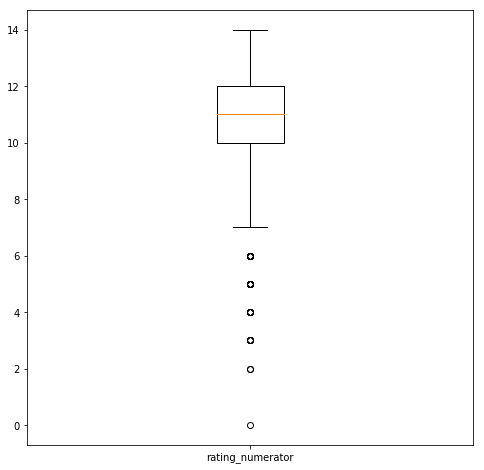

In [194]:
plt.figure(figsize=(8,8));
plt.boxplot(tt_final['rating_numerator'], labels=['rating_numerator']);

The bottom outliers show us that nearly no dog scores below the sufficiency. I want to investigate what was so special about the them that gave these dogs such low ratings. I will query the specific entries and look up the urls and the tweets.

In [195]:
bottom10 = tt_final.sort_values(['rating_numerator'], ascending=True,).head(10)
bottom10[['expanded_urls', 'rating_numerator', 'jpg_url', 'text', 'all_p']]

,expanded_urls,rating_numerator,jpg_url,text,all_p
223,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/...",0,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,American_Staffordshire_terrier
1341,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t...,Maltese_dog
1797,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t....,miniature_pinscher
859,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxO...,Chihuahua
1736,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t...,pug
1494,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t....,soft-coated_wheaten_terrier
524,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t...,Afghan_hound
907,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co...,Dandie_Dinmont
1864,https://twitter.com/dog_rates/status/666649482315059201/photo/1,4,https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg,Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.c...,Border_collie
700,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.c...,Pembroke


So, after exploring the text and the images of those ratings, I noticed that many cases were other animals being rated. Hence, the predictive algorithm made mistakes (e.g. it considered a cow a border collie). Some other cases, it was dogs in weird set ups.

I will now list the top 10 most frequent breeds **according to p1:**

In [196]:
tt_final[(tt_final.p1_dog == True)]['p1'].value_counts().head(10)

golden_retriever      132
Labrador_retriever     88
Pembroke               87
Chihuahua              76
pug                    54
chow                   41
toy_poodle             38
Pomeranian             37
Samoyed                37
malamute               29
Name: p1, dtype: int64

I should keep in mind that some of the entries in this column are not even dog breeds at all. A quick check using the .unique() function allows us to see that the predictive algorithm sometimes recognized other random objects or animals. Therefore this result is inherenthly biased. In fact, for all we know, the golden retrievers in this dataset might be more than 132: as we saw in the cleaning phase, the algorithm might have recognized something else as a first prediction, while identifying a dog breed in the p2 or p3 stage. **This was why I wanted to calculate the 'all_p' field.**

In [163]:
all_p.value_counts().head(10)

golden_retriever      150
Labrador_retriever    101
Pembroke               94
Chihuahua              86
pug                    62
toy_poodle             51
chow                   47
Pomeranian             41
Samoyed                38
malamute               32
Name: all_p, dtype: int64

The top average 'likes' grouped by breed

In [164]:
tt_final.groupby(['all_p'])['favorite_count'].mean().sort_values(ascending=False).head(10)
# this is a kind of sql "group by.. order by .. desc limit 10"

all_p
Saluki                     23748.000000
French_bulldog             19723.741935
Afghan_hound               17042.000000
black-and-tan_coonhound    16739.000000
flat-coated_retriever      16545.250000
Irish_water_spaniel        16121.333333
Bedlington_terrier         15000.250000
Leonberg                   14671.000000
whippet                    14097.777778
standard_poodle            13703.818182
Name: favorite_count, dtype: float64

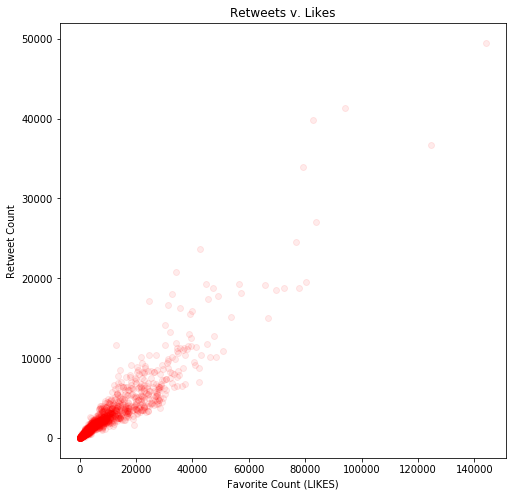

In [165]:
plt.figure(figsize=(8,8));
plt.plot(tt_final['favorite_count'], tt_final['retweet_count'], 'ro', alpha = 0.08)
plt.xlabel('Favorite Count (LIKES)')
plt.ylabel('Retweet Count')
plt.title('Retweets v. Likes');


We see a very strong correlation between the two variables. The more a tweet is liked, the more is retweeted. However, we should not infer causation, in other words, we do not know if Likes directly drive Retweets.